# HOMEWORK4_GROUP4

- Deekshitha Gona Id: 2399282
- Yuzhen Hu  Id: 2299391
- Jayaprakash Yadav Guntumani Id: 2391724
- Aakanksha Govindaraju Id: 2384001
- George Dani Id: 1844097

# Part 1 Describe Batch Normalization.

Batch Normalization
Batch Normalization (BatchNorm) is a technique introduced to improve the training of deep neural networks. It addresses several challenges inherent in training deep models, such as internal covariate shift, vanishing/exploding gradients, and sensitivity to weight initialization. By normalizing the inputs of each layer, BatchNorm facilitates faster and more stable training, enhances generalization, and can act as a form of regularization.

1. Concept of Batch Normalization
Internal Covariate Shift:
Internal covariate shift refers to the change in the distribution of network activations due to the updating of parameters during training. This shift can slow down the training process as each layer continuously adapts to the changing input distributions from the previous layers.

Batch Normalization's Role:
Batch Normalization mitigates internal covariate shift by normalizing the inputs to each layer within a mini-batch. This normalization ensures that the inputs maintain a stable distribution, typically with a mean of 0 and a standard deviation of 1. Stabilizing these distributions allows for:

Higher Learning Rates: Enables faster convergence without the risk of divergence.
Reduced Sensitivity to Initialization: Less dependent on the initial weights, simplifying the weight initialization process.
Regularization Effect: Introduces slight noise through mini-batch statistics, which can reduce overfitting.
2. Mathematical Foundations
Batch Normalization operates by normalizing the inputs of a layer and then scaling and shifting them using learnable parameters. Here's a detailed mathematical breakdown:



3. Differences from Optimization Methods (SGD and Mini-Batch Gradient Descent)
Batch Normalization vs. Optimization Algorithms:

It's essential to clarify that Batch Normalization is not an optimization algorithm like Stochastic Gradient Descent (SGD) or Mini-Batch Gradient Descent. Instead, it is a technique applied within the neural network architecture to stabilize and accelerate the training process. Here's how BatchNorm differs and interacts with these optimization methods:

a. Stochastic Gradient Descent (SGD):
Purpose: An optimization algorithm used to minimize the loss function by iteratively updating the model's parameters based on the gradient of the loss with respect to those parameters.


b. Mini-Batch Gradient Descent:
Purpose: A variant of gradient descent that updates the model parameters based on the average gradient computed over a mini-batch of data points, balancing between the efficiency of SGD and the stability of full-batch gradient descent.


k: Mini-batch size.
c. Integration with Batch Normalization:
Interdependency: BatchNorm can be integrated with these optimization methods to enhance their performance. By stabilizing the input distributions, BatchNorm allows optimization algorithms to take larger steps (higher learning rates) and reduces the sensitivity to the initial weights.
Combined Effect: When used alongside SGD or Mini-Batch Gradient Descent, BatchNorm can lead to faster convergence and improved model performance by ensuring that the gradients remain well-behaved during training.
4. Impact on Model Training, Validation, and Testing
Batch Normalization influences various phases of the model lifecycle:

a. Training Phase:
Stabilized Learning Process: By normalizing inputs, BatchNorm reduces the risk of exploding or vanishing gradients, facilitating a more stable and efficient learning process.
Higher Learning Rates: Enables the use of higher learning rates, which can accelerate convergence.
Regularization Effect: The use of batch statistics introduces noise, which can help prevent overfitting by making the model less reliant on specific training examples.
Reduced Dependence on Weight Initialization: Simplifies the process of weight initialization, as the network becomes less sensitive to the starting weights.

b. Validation and Testing Phases:
Consistent Behavior: During inference, BatchNorm uses the running averages of mean and variance, ensuring that the normalization process remains consistent regardless of the batch size or data distribution.
Improved Generalization: By acting as a regularizer and reducing overfitting during training, BatchNorm often leads to better performance on unseen data during validation and testing.
No Additional Computation: Since the running averages are fixed during inference, BatchNorm does not introduce significant computational overhead during these phases.

c. Handling Different Batch Sizes:
Large Batch Sizes: Provide more reliable estimates of the mean and variance, enhancing the effectiveness of BatchNorm.
Small Batch Sizes: Can lead to noisy estimates of the statistics, potentially diminishing the benefits. In such cases, alternatives like Layer Normalization or Instance Normalization might be more appropriate.

5. Effects on Model Performance and Training Dynamics
a. Accelerated Convergence:
Faster Training: By maintaining stable activation distributions, BatchNorm allows the optimization algorithm to converge more quickly.
Reduced Oscillations: Stabilizes the gradients, minimizing oscillations during training and enabling smoother progress towards the minimum.
b. Enhanced Generalization:
Regularization: The slight noise introduced by using mini-batch statistics acts similarly to dropout, promoting the learning of more robust features that generalize better to new data.
Reduced Overfitting: Helps prevent the model from becoming too tailored to the training data, enhancing its performance on validation and test sets.
c. Mitigation of Vanishing/Exploding Gradients:
Stable Gradients: By normalizing the activations, BatchNorm ensures that gradients remain within a reasonable range, preventing them from becoming too small or too large during backpropagation.
d. Flexibility in Model Design:
Simplified Architecture: With BatchNorm handling the normalization, the model becomes less sensitive to the choice of activation functions and weight initialization methods.




Books Refered:

Deep Learning by Ian Goodfellow, Yoshua Bengio, and Aaron Courville –

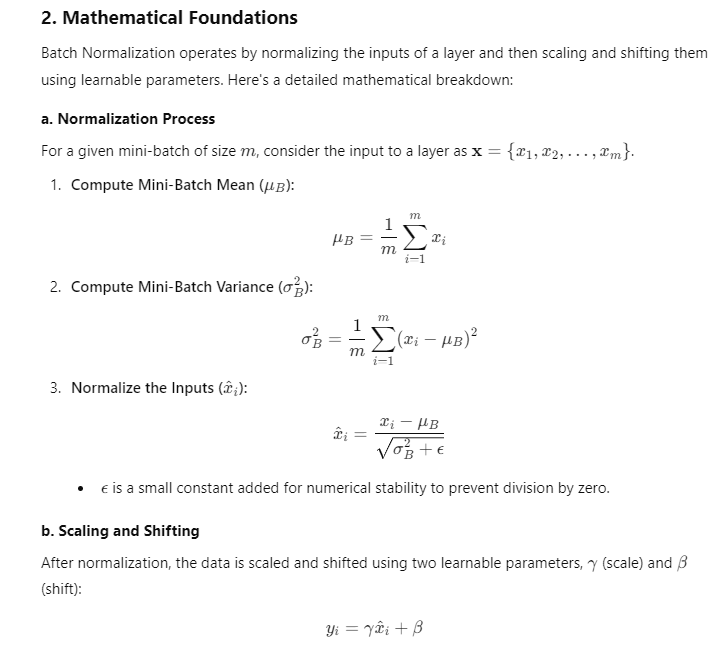

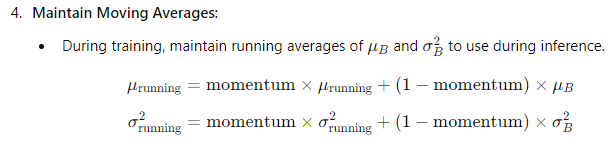

****Dani****






Batch normalization is a technique used to prevent overfitting in neural networks. Overfitting occurs when the model adapts too well to the data provided and cannot generalize for new data. Batch normalization works by adjusting the scales of the activation so that they have a mean of 0 and standard deviation of 1. This process is done to normalize each layer of the neural network. During training, normalization reduces the internal covariate shift which is the change in distribution of the activations of a layer as each weight is updated. Batch normalization can be implemented by adding operations to each layer in the network that calculates the mean and standard deviation of each feature in the mini batch and then normalizing the activations using the calculated mean and standard deviation. After the normalization of the activations, the activations are furthered adjusted to more learning parameters: gamma and beta. Gamma is the parameter that controls the how much the normalized activations are scaled. Beta is the parameter that controls how much the activations are shifted. The goal of this is so that model can now adapt to find the optimal distribution of activation without having to always have activations with mean of 0 and standard deviation of 1. Batch normalization is a relatively new technique; however, it has shown the ability to improve the performance of deep neural networks.

# Part 2: Classifying fashion Mnist using artificial neural networks

In [ ]:
# pip install tensorflow

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, datasets, layers, optimizers

In [ ]:
# https://keras.io/api/datasets/

#(X_train_full, y_train_full), (X_test, y_test) = datasets.mnist.load_data()

In [3]:
# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [4]:
X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [ ]:
X_train.shape

(50000, 28, 28)

In [ ]:
X_valid.shape

(10000, 28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# we can also get the label name for the corresponding class index.

9
Ankle boot


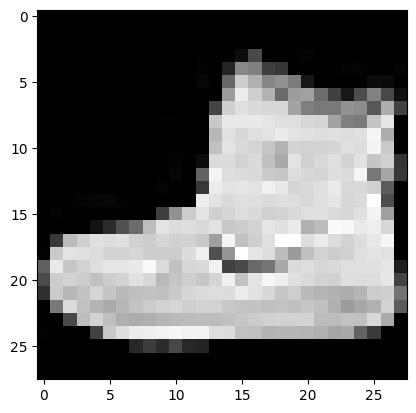

In [ ]:
plt.imshow(X_train[0], cmap="gray")
label_index=(y_train[0]);
print(label_index)
label_name = label_names[label_index]
print(label_name)

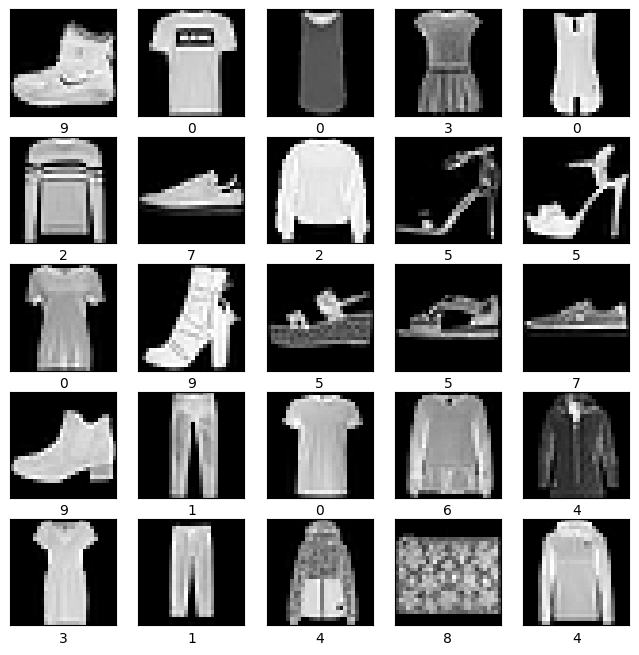

In [ ]:
plt.figure(figsize=(8, 8))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.xlabel(y_train[i])
  plt.xticks([])
  plt.yticks([]);

In [ ]:
y_train

array([9, 0, 0, ..., 5, 1, 7], dtype=uint8)

In [6]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

# Experience with different layers
## Model 1 Experience with two layers

In [ ]:
# Use a flatten input layer and output layer

ann1 = models.Sequential([
                        layers.Flatten(input_shape=(28, 28)),
                        layers.Dense(10, activation='softmax')
])

ann1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
ann1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ann1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7344 - loss: 0.8017
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8382 - loss: 0.4757
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8503 - loss: 0.4419
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8533 - loss: 0.4268
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8542 - loss: 0.4185


In [ ]:
info = ann1.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8593 - loss: 0.4039 - val_accuracy: 0.8523 - val_loss: 0.4277
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8595 - loss: 0.4032 - val_accuracy: 0.8557 - val_loss: 0.4218
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8634 - loss: 0.3994 - val_accuracy: 0.8473 - val_loss: 0.4411
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8646 - loss: 0.3913 - val_accuracy: 0.8532 - val_loss: 0.4205
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8666 - loss: 0.3899 - val_accuracy: 0.8503 - val_loss: 0.4293
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8649 - loss: 0.3883 - val_accuracy: 0.8519 - val_loss: 0.4268
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8647 - loss: 0.3831 - val_accuracy: 0.8578 - val_loss: 0.4144
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8662 - loss: 0.3846 - 

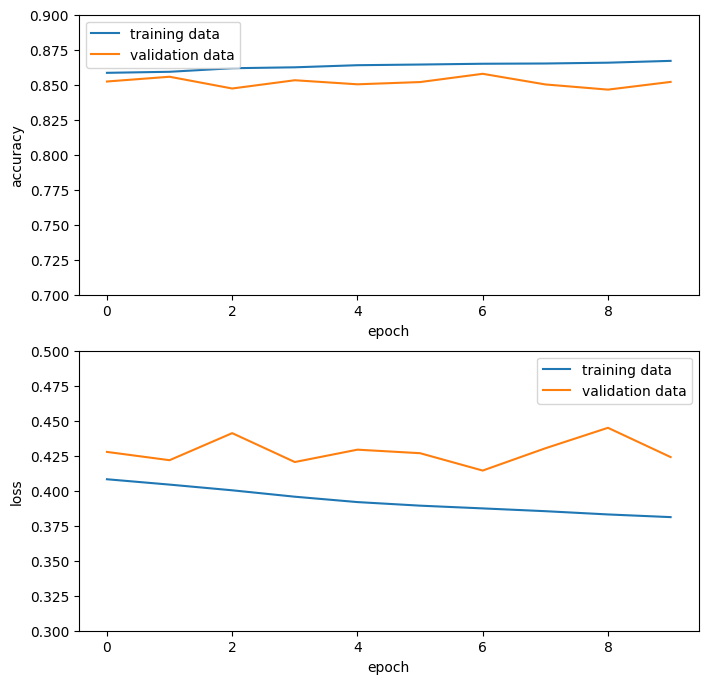

In [ ]:
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

loss = info.history['loss']
val_loss = info.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.7,0.9])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.3,0.5])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [ ]:
ann1.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8436 - loss: 0.4436


[0.4517118036746979, 0.8424999713897705]

In [ ]:
y_pred = ann1.predict(X_test)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([2.1479589e-07, 2.8546612e-09, 7.1547474e-06, 4.4297540e-06,
       2.8499219e-06, 7.1443915e-02, 2.5669144e-05, 4.9345896e-02,
       7.6428456e-03, 8.7152702e-01], dtype=float32)

In [ ]:
np.argmax(y_pred[0])

9

9


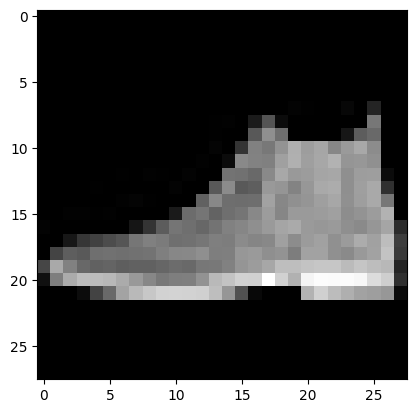

In [ ]:
plt.imshow(X_test[0], cmap="gray")
print(y_test[0]);

In [ ]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_labels)
cm

array([[727,   2,  15,  57,   5,   0, 175,   0,  19,   0],
       [  2, 958,   3,  29,   3,   0,   3,   0,   2,   0],
       [ 12,   6, 760,  12, 108,   0,  87,   0,  15,   0],
       [ 15,  13,  18, 865,  26,   0,  52,   1,  10,   0],
       [  0,   1, 132,  34, 728,   0,  94,   0,  11,   0],
       [  0,   0,   0,   1,   0, 910,   0,  57,   5,  27],
       [ 84,   3, 132,  46,  80,   0, 625,   0,  30,   0],
       [  0,   0,   0,   0,   0,  24,   0, 955,   0,  21],
       [  4,   1,  10,   7,   1,   3,  10,   4, 960,   0],
       [  0,   0,   0,   0,   0,   8,   1,  54,   0, 937]])

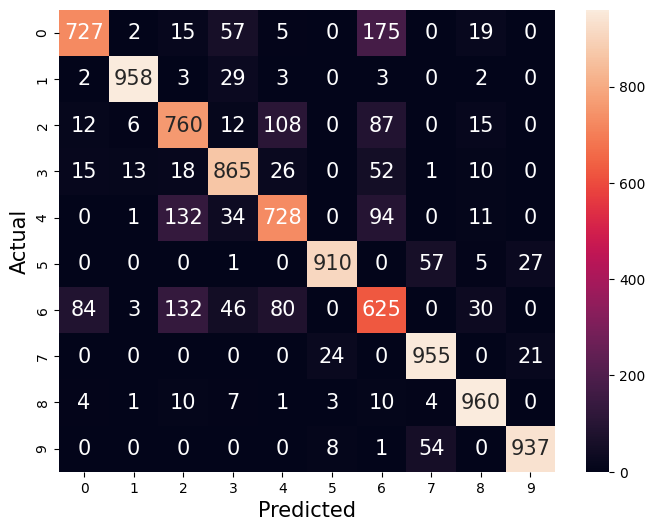

In [ ]:
import seaborn as sn

plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1000
           1       0.97      0.96      0.97      1000
           2       0.71      0.76      0.73      1000
           3       0.82      0.86      0.84      1000
           4       0.77      0.73      0.75      1000
           5       0.96      0.91      0.94      1000
           6       0.60      0.62      0.61      1000
           7       0.89      0.95      0.92      1000
           8       0.91      0.96      0.94      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



## Observations: Using model with an input and output layer, we got an accuracy of 84%

## Model 2 Adding one hidden layer

In [7]:
# Use one hidden layer
from tensorflow.keras.callbacks import EarlyStopping
ann2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
ann2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# Fit the model with early stopping, adding validation data
ann2.fit(
    X_train, y_train,
    epochs=50,  # Set a higher number of epochs; early stopping will handle the termination
    validation_data=(X_valid, y_valid),
    callbacks=[early_stop]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7696 - loss: 0.6637 - val_accuracy: 0.8295 - val_loss: 0.4408
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8593 - loss: 0.3908 - val_accuracy: 0.8452 - val_loss: 0.4136
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8732 - loss: 0.3476 - val_accuracy: 0.8706 - val_loss: 0.3748
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8815 - loss: 0.3182 - val_accuracy: 0.8615 - val_loss: 0.3748
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8906 - loss: 0.2942 - val_accuracy: 0.8773 - val_loss: 0.3431
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8972 - loss: 0.2812 - val_accuracy: 0.8789 - val_loss: 0.3352
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8972 - loss: 0.2735 - val_accuracy: 0.8812 - val_loss: 0.3358
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9062 - loss: 0.2583

In [8]:
ann2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8830 - loss: 0.3339


[0.3328585922718048, 0.8834999799728394]

In [9]:
y_pred = ann2.predict(X_test)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.20650085e-08, 1.09492260e-09, 4.00622729e-10, 1.60581837e-09,
       9.71716152e-10, 2.38505029e-03, 5.24870700e-07, 1.89462136e-02,
       2.94338463e-07, 9.78667796e-01], dtype=float32)

In [10]:
np.argmax(y_pred[0])

9

9


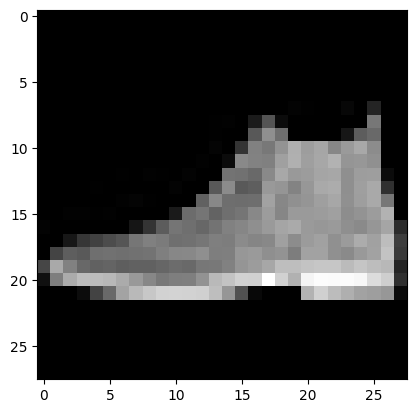

In [11]:
plt.imshow(X_test[0], cmap="gray")
print(y_test[0]);

In [12]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_labels)
cm

array([[866,   1,  20,  12,   5,   0,  92,   1,   3,   0],
       [  1, 972,   2,  18,   5,   0,   2,   0,   0,   0],
       [ 15,   2, 799,   7, 125,   0,  51,   0,   1,   0],
       [ 33,  12,  19, 860,  40,   0,  32,   0,   4,   0],
       [  0,   0,  77,  21, 850,   0,  51,   0,   1,   0],
       [  0,   0,   0,   0,   0, 965,   0,  24,   1,  10],
       [145,   2, 100,  18,  77,   0, 652,   0,   6,   0],
       [  0,   0,   0,   0,   0,  14,   0, 959,   0,  27],
       [  7,   1,   4,   1,   8,   2,   8,   6, 963,   0],
       [  0,   0,   0,   0,   0,  16,   1,  34,   0, 949]])

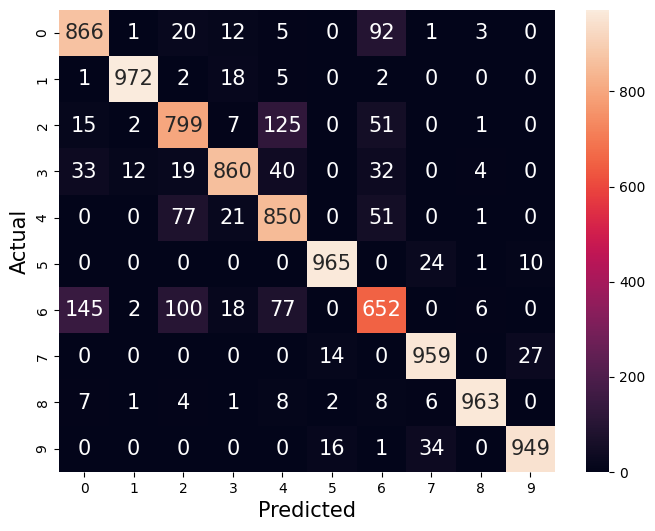

In [14]:
import seaborn as sn

plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.78      0.80      0.79      1000
           3       0.92      0.86      0.89      1000
           4       0.77      0.85      0.81      1000
           5       0.97      0.96      0.97      1000
           6       0.73      0.65      0.69      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Using 1 Hidden Layer we got an accuracy of 88%

In [16]:
ann2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

# Experimenting with different optimizer
## Model 3 Using RMsprop optimizer

In [17]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop
ann_optm = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

ann_optm.compile(optimizer=RMSprop(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


ann_optm.fit(
    X_train, y_train,
    epochs=50,  # Set a higher number of epochs; early stopping will handle the termination
    validation_data=(X_valid, y_valid),
    callbacks=[early_stop]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7700 - loss: 0.6656 - val_accuracy: 0.8496 - val_loss: 0.4244
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8569 - loss: 0.3947 - val_accuracy: 0.8614 - val_loss: 0.3915
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8744 - loss: 0.3464 - val_accuracy: 0.8651 - val_loss: 0.3764
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8809 - loss: 0.3329 - val_accuracy: 0.8677 - val_loss: 0.4130
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8898 - loss: 0.3053 - val_accuracy: 0.8765 - val_loss: 0.3632
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8920 - loss: 0.2989 - val_accuracy: 0.8680 - val_loss: 0.3798
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8979 - loss: 0.2880 - val_accuracy: 0.8738 - val_loss: 0.3945
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9000 - loss: 0.2804 -

In [18]:
ann_optm.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8670 - loss: 0.3720


[0.3802236318588257, 0.8665000200271606]

In [19]:
# Evaluate the model and get predictions
ann_optm.evaluate(X_test, y_test)
y_pred = ann_optm.predict(X_test)

# Find the predicted labels
y_pred_labels = [np.argmax(i) for i in y_pred]

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8670 - loss: 0.3720
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.77      0.77      0.77      1000
           3       0.83      0.88      0.85      1000
           4       0.80      0.77      0.78      1000
           5       0.99      0.93      0.96      1000
           6       0.64      0.68      0.66      1000
           7       0.92      0.96      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## using this RMsprop optimizer we got an accuracy of 87%

## Model 4 Experimenting with  SGD optimizer with learninglate 0.001

In [20]:

ann_optm.compile(optimizer=optimizers.SGD(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
ann_optm.fit(
    X_train, y_train,
    epochs=50,  # Set a higher number of epochs; early stopping will handle the termination
    validation_data=(X_valid, y_valid),
    callbacks=[early_stop]
)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9020 - loss: 0.2742 - val_accuracy: 0.8892 - val_loss: 0.3294
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9074 - loss: 0.2580 - val_accuracy: 0.8900 - val_loss: 0.3235
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9098 - loss: 0.2470 - val_accuracy: 0.8914 - val_loss: 0.3205
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9107 - loss: 0.2498 - val_accuracy: 0.8915 - val_loss: 0.3189
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9088 - loss: 0.2531 - val_accuracy: 0.8908 - val_loss: 0.3174
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9112 - loss: 0.2490 - val_accuracy: 0.8907 - val_loss: 0.3166
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9124 - loss: 0.2466 - val_accuracy: 0.8921 - val_loss: 0.3155
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9119 - loss: 0.2431 -

In [21]:
ann_optm.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8841 - loss: 0.3311


[0.3357592821121216, 0.8830000162124634]

In [22]:
y_pred = ann_optm.predict(X_test)

# Find the predicted labels
y_pred_labels = [np.argmax(i) for i in y_pred]

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.80      0.80      1000
           3       0.89      0.89      0.89      1000
           4       0.78      0.83      0.80      1000
           5       0.97      0.96      0.97      1000
           6       0.71      0.67      0.69      1000
           7       0.93      0.96      0.94      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Using SGDOptimizer we have got an accuracy of 88%

## Model 5 Experimenting with different batch size and learning rate
# First we try batch_size = 32 , learning rate = 0.003

In [23]:


ann_batch = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

ann_batch.compile(optimizer=optimizers.Adam(learning_rate=0.003),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann_batch.fit(X_train, y_train,
         epochs= 50,
         batch_size=32,  # Set batch size to 32
         validation_data=(X_valid, y_valid),
         callbacks=[early_stop] )



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7823 - loss: 0.6139 - val_accuracy: 0.8465 - val_loss: 0.4292
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8569 - loss: 0.3963 - val_accuracy: 0.8524 - val_loss: 0.4144
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8704 - loss: 0.3515 - val_accuracy: 0.8743 - val_loss: 0.3557
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8787 - loss: 0.3287 - val_accuracy: 0.8653 - val_loss: 0.3682
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8847 - loss: 0.3091 - val_accuracy: 0.8704 - val_loss: 0.3602
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8919 - loss: 0.2920 - val_accuracy: 0.8739 - val_loss: 0.3590


In [24]:
ann_batch.evaluate(X_test, y_test)
y_pred = ann_batch.predict(X_test)

# Find the predicted labels
y_pred_labels = [np.argmax(i) for i in y_pred]

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8658 - loss: 0.3756
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1000
           1       0.99      0.96      0.97      1000
           2       0.73      0.82      0.77      1000
           3       0.86      0.89      0.87      1000
           4       0.78      0.75      0.77      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.59      0.65      1000
           7       0.95      0.93      0.94      1000
           8       0.94      0.98      0.96      1000
           9       0.93      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## Using batch size=32 , Learning rate=0.003, we got 87% accuracy

## Model 6 Then we try batch_size =256 ,learning rate 0.001

In [25]:
ann_batch.compile(optimizer=optimizers.Adam(learning_rate=0.003),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann_batch.fit(X_train, y_train,
         epochs= 50,
         batch_size=256,  # Set batch size to 256
         validation_data=(X_valid, y_valid),
         callbacks=[early_stop] )


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8917 - loss: 0.2978 - val_accuracy: 0.8826 - val_loss: 0.3230
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8987 - loss: 0.2738 - val_accuracy: 0.8798 - val_loss: 0.3364
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9033 - loss: 0.2629 - val_accuracy: 0.8837 - val_loss: 0.3234
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9061 - loss: 0.2514 - val_accuracy: 0.8861 - val_loss: 0.3224
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9076 - loss: 0.2463 - val_accuracy: 0.8892 - val_loss: 0.3189
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9095 - loss: 0.2392 - val_accuracy: 0.8847 - val_loss: 0.3270
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9149 - loss: 0.2285 - val_accuracy: 0.8867 - val_loss: 0.3244
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9160 - loss: 0.2245 - val_accuracy:

In [26]:
ann_batch.evaluate(X_test, y_test)
y_pred = ann_batch.predict(X_test)

# Find the predicted labels
y_pred_labels = [np.argmax(i) for i in y_pred]

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8792 - loss: 0.3352
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.74      0.84      0.79      1000
           3       0.91      0.86      0.88      1000
           4       0.79      0.79      0.79      1000
           5       0.97      0.95      0.96      1000
           6       0.74      0.64      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### Using batch size of 256 and learning rate of 0.001 we got an accuracy of 88%

### Model 7 Here we are trying to build an overfitted model using 3 hidden layers

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, datasets, regularizers
from keras.layers import Dense, Flatten, Dropout

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [29]:
# Load the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [30]:
X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [31]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

In [32]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6953 - loss: 0.8994 - val_accuracy: 0.8397 - val_loss: 0.4427
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8513 - loss: 0.4197 - val_accuracy: 0.8575 - val_loss: 0.4101
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8689 - loss: 0.3733 - val_accuracy: 0.8673 - val_loss: 0.3677
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8765 - loss: 0.3415 - val_accuracy: 0.8768 - val_loss: 0.3474
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8848 - loss: 0.3148 - val_accuracy: 0.8721 - val_loss: 0.3684
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8883 - loss: 0.3073 - val_accuracy: 0.8745 - val_loss: 0.3541
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8928 - loss: 0.2912 - val_accuracy: 0.8799 - val_loss: 0.3293
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8971 - loss: 0.2774 - val_accuracy: 

### Training accuracy is 96.54% and validation accuracy is 88.34%

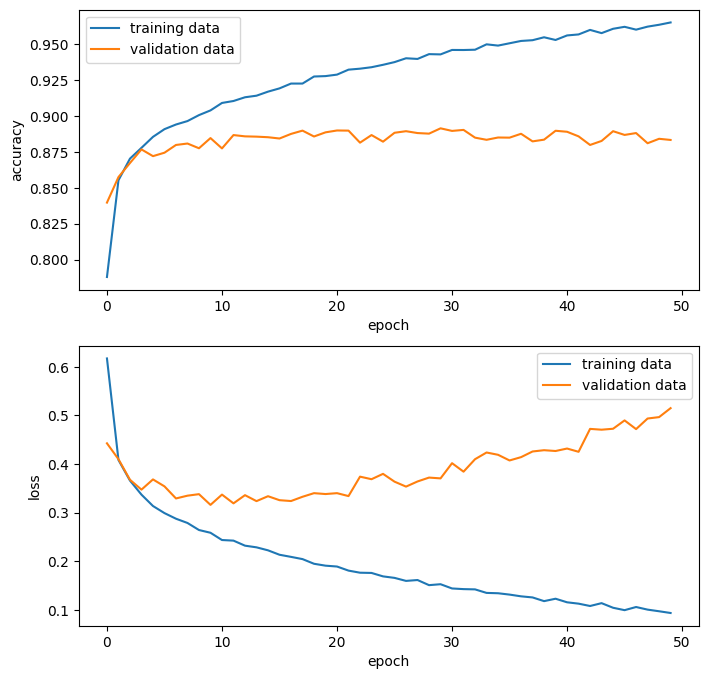

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [37]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

# Find the predicted labels
y_pred_labels = [np.argmax(i) for i in y_pred]

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8818 - loss: 0.5390
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.80      0.79      0.80      1000
           3       0.91      0.90      0.90      1000
           4       0.73      0.89      0.80      1000
           5       0.99      0.93      0.96      1000
           6       0.78      0.59      0.67      1000
           7       0.92      0.98      0.95      1000
           8       0.98      0.93      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



### Observation: the above graph is a clearly indicating the case of overfitting. We will try to reduce the overfitting using the below regularization methods

## Model 8 l2 regularization

In [38]:
model4 = Sequential()
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(128, activation='relu', kernel_regularizer= regularizers.l2(0.005)))
model4.add(Dense(64, activation='relu', kernel_regularizer= regularizers.l2(0.005)))
model4.add(Dense(32, activation='relu', kernel_regularizer= regularizers.l2(0.005)))
model4.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model4.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
history4 = model4.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7015 - loss: 1.9233 - val_accuracy: 0.8283 - val_loss: 0.9253
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8293 - loss: 0.8727 - val_accuracy: 0.8390 - val_loss: 0.7664
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8367 - loss: 0.7465 - val_accuracy: 0.8176 - val_loss: 0.7528
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8401 - loss: 0.7011 - val_accuracy: 0.8313 - val_loss: 0.7004
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8419 - loss: 0.6694 - val_accuracy: 0.8412 - val_loss: 0.6607
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8453 - loss: 0.6445 - val_accuracy: 0.8391 - val_loss: 0.6545
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8435 - loss: 0.6334 - val_accuracy: 0.8100 - val_loss: 0.7125
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8439 - loss: 0.6200 - val_accuracy: 0.

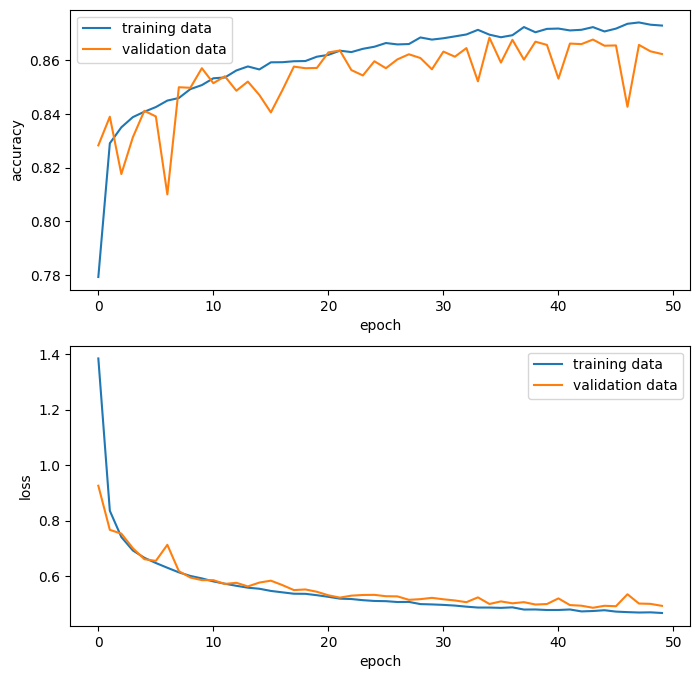

In [41]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [42]:
model4.evaluate(X_test, y_test)
y_pred = model4.predict(X_test)

# Find the predicted labels
y_pred_labels = [np.argmax(i) for i in y_pred]

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8590 - loss: 0.5146
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1000
           1       0.95      0.96      0.96      1000
           2       0.67      0.87      0.75      1000
           3       0.86      0.86      0.86      1000
           4       0.82      0.67      0.74      1000
           5       0.94      0.95      0.94      1000
           6       0.70      0.59      0.64      1000
           7       0.91      0.95      0.93      1000
           8       0.95      0.96      0.96      1000
           9       0.96      0.92      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



## Using l2 regularization we got 86% accuracy

### Model 9 l1 regularizer

In [43]:
model6 = Sequential()
model6.add(Flatten(input_shape=(28,28)))
model6.add(Dense(128, activation='relu', kernel_regularizer= regularizers.l1(0.005)))
model6.add(Dense(64, activation='relu', kernel_regularizer= regularizers.l1(0.005)))
model6.add(Dense(32, activation='relu', kernel_regularizer= regularizers.l1(0.005)))
model6.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model6.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
history6 = model6.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5841 - loss: 9.3448 - val_accuracy: 0.7366 - val_loss: 1.6879
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7456 - loss: 1.5721 - val_accuracy: 0.7543 - val_loss: 1.3664
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7611 - loss: 1.3240 - val_accuracy: 0.7701 - val_loss: 1.2171
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7741 - loss: 1.1987 - val_accuracy: 0.7610 - val_loss: 1.1770
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7779 - loss: 1.1360 - val_accuracy: 0.7630 - val_loss: 1.1295
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7757 - loss: 1.1067 - val_accuracy: 0.7666 - val_loss: 1.0988
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7790 - loss: 1.0735 - val_accuracy: 0.7775 - val_loss: 1.0503
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7850 - loss: 1.0472 - val_accuracy: 0.

In [46]:
model6.evaluate(X_test, y_test)
y_pred = model6.predict(X_test)

# Find the predicted labels
y_pred_labels = [np.argmax(i) for i in y_pred]

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8042 - loss: 0.8335
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1000
           1       0.96      0.95      0.96      1000
           2       0.64      0.79      0.71      1000
           3       0.85      0.77      0.81      1000
           4       0.68      0.70      0.69      1000
           5       0.82      0.94      0.88      1000
           6       0.53      0.50      0.51      1000
           7       0.90      0.87      0.88      1000
           8       0.93      0.91      0.92      1000
           9       0.94      0.86      0.90      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



## With l1 regularizer we got 80% accuracy

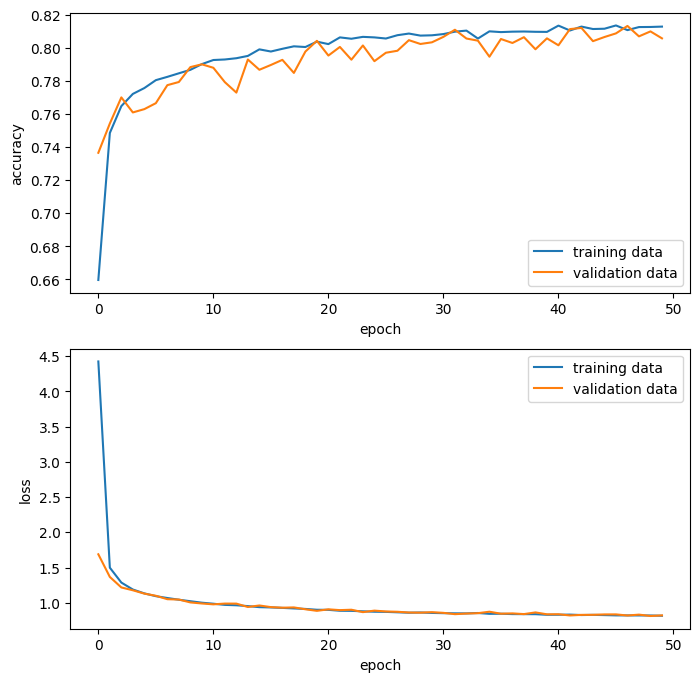

In [47]:
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']

loss = history6.history['loss']
val_loss = history6.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

## Model 10 drop out regularization

In [48]:
model10 = Sequential()
model10.add(Flatten(input_shape=(28,28)))
model10.add(Dense(128, activation='relu'))
model10.add(Dropout(rate=0.4))
model10.add(Dense(64, activation='relu'))
model10.add(Dropout(rate=0.3))
model10.add(Dense(32, activation='relu'))
model10.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model10.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
history10 = model10.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5924 - loss: 1.1249 - val_accuracy: 0.8197 - val_loss: 0.4870
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8074 - loss: 0.5397 - val_accuracy: 0.8456 - val_loss: 0.4148
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8291 - loss: 0.4802 - val_accuracy: 0.8535 - val_loss: 0.3991
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8417 - loss: 0.4425 - val_accuracy: 0.8508 - val_loss: 0.3987
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8502 - loss: 0.4241 - val_accuracy: 0.8674 - val_loss: 0.3673
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8512 - loss: 0.4079 - val_accuracy: 0.8650 - val_loss: 0.3621
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8570 - loss: 0.4002 - val_accuracy: 0.8712 - val_loss: 0.3572
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8579 - loss: 0.3899 - val_accuracy: 0

In [52]:
model10.evaluate(X_test, y_test)
y_pred = model10.predict(X_test)

# Find the predicted labels
y_pred_labels = [np.argmax(i) for i in y_pred]

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8865 - loss: 0.3393
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.81      0.80      1000
           3       0.84      0.91      0.88      1000
           4       0.79      0.82      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.75      0.66      0.70      1000
           7       0.93      0.97      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# BEST MODEL SO FAR : Using the drop-out layer we got an accuracy of 89%, which is highest among all the other models


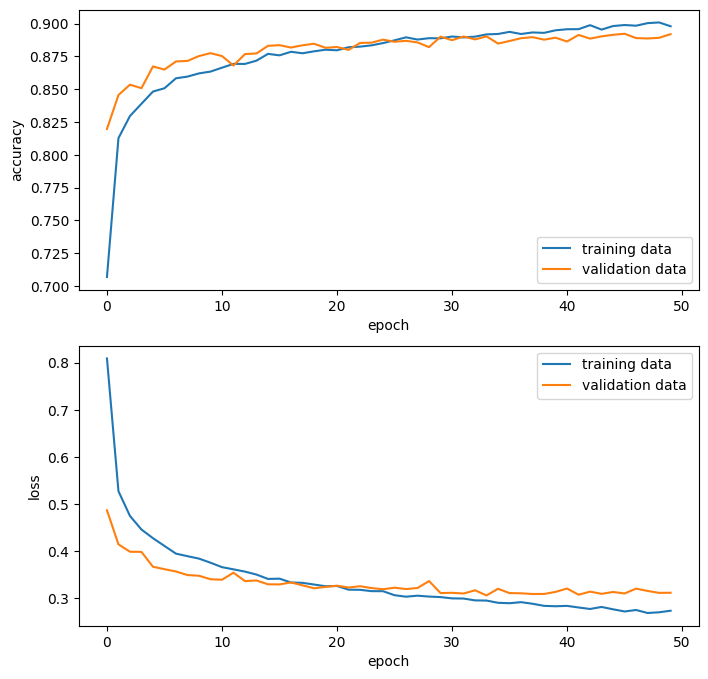

In [51]:
acc = history10.history['accuracy']
val_acc = history10.history['val_accuracy']

loss = history10.history['loss']
val_loss = history10.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

###  we can observe that the validation accuracy is slightly lower than the training accuracy and the validation loss is slightly higher than the training loss. Although there is a small gap between training and validation metrics, this behavior suggests that dropout is helping to prevent overfitting. The model is generalizing reasonably well to unseen data.

If you were experiencing more severe overfitting (a larger gap between training and validation metrics), you could try experimenting with different dropout rates (e.g., increasing the rate) or applying dropout to more layers in your model to further reduce overfitting.

However, in this case, model10 seems to be performing quite well, and the current dropout configuration is likely sufficient.

## Model 11 Here we changing the number of neurons in the layers

In [53]:
model11 = Sequential()
model11.add(Flatten(input_shape=(28,28)))
model11.add(Dense(128, activation='relu'))
model11.add(Dense(10, activation='softmax'))

model11.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

history11 = model11.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7341 - loss: 0.7917 - val_accuracy: 0.8377 - val_loss: 0.4676
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8471 - loss: 0.4315 - val_accuracy: 0.8529 - val_loss: 0.4211
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8599 - loss: 0.3934 - val_accuracy: 0.8613 - val_loss: 0.3792
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8765 - loss: 0.3489 - val_accuracy: 0.8614 - val_loss: 0.3854
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8831 - loss: 0.3267 - val_accuracy: 0.8672 - val_loss: 0.3845
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8867 - loss: 0.3163 - val_accuracy: 0.8746 - val_loss: 0.3621
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8904 - loss: 0.2998 - val_accuracy: 0.8752 - val_loss: 0.3446
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8972 - loss: 0.2798 - val_accuracy: 0.

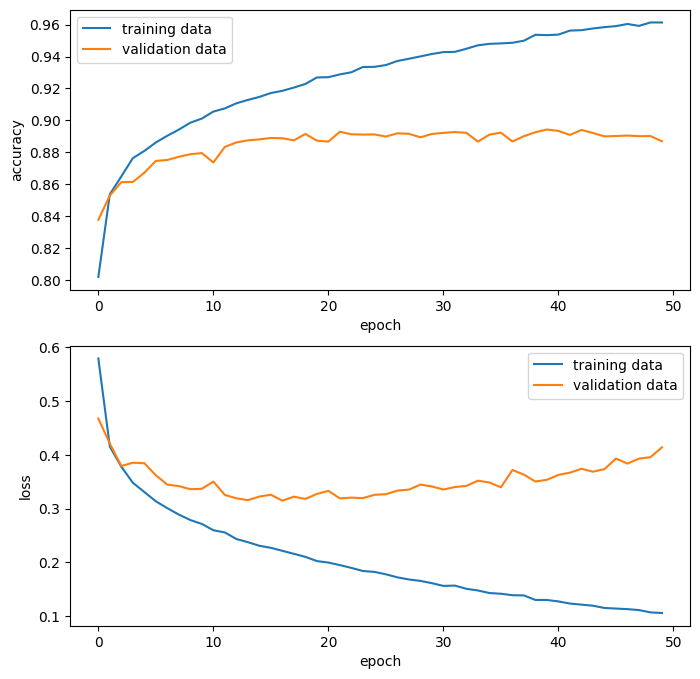

In [54]:
acc = history11.history['accuracy']
val_acc = history11.history['val_accuracy']

loss = history11.history['loss']
val_loss = history11.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [55]:
model11.evaluate(X_test, y_test)
y_pred = model11.predict(X_test)

# Find the predicted labels
y_pred_labels = [np.argmax(i) for i in y_pred]

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8816 - loss: 0.4474
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.81      0.79      1000
           3       0.89      0.90      0.89      1000
           4       0.74      0.85      0.79      1000
           5       0.98      0.95      0.97      1000
           6       0.77      0.59      0.67      1000
           7       0.93      0.97      0.95      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [56]:
model12 = Sequential()
model12.add(Flatten(input_shape=(28,28)))
model12.add(Dense(64, activation='relu'))
model12.add(Dense(10, activation='softmax'))

model12.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

history12 = model12.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7030 - loss: 0.8899 - val_accuracy: 0.8384 - val_loss: 0.4610
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8493 - loss: 0.4381 - val_accuracy: 0.8455 - val_loss: 0.4432
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8615 - loss: 0.3893 - val_accuracy: 0.8644 - val_loss: 0.3925
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8687 - loss: 0.3691 - val_accuracy: 0.8692 - val_loss: 0.3760
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8762 - loss: 0.3512 - val_accuracy: 0.8694 - val_loss: 0.3770
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8816 - loss: 0.3318 - val_accuracy: 0.8694 - val_loss: 0.3724
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8861 - loss: 0.3173 - val_accuracy: 0.8727 - val_loss: 0.3583
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8871 - loss: 0.3123 - val_accuracy: 0.

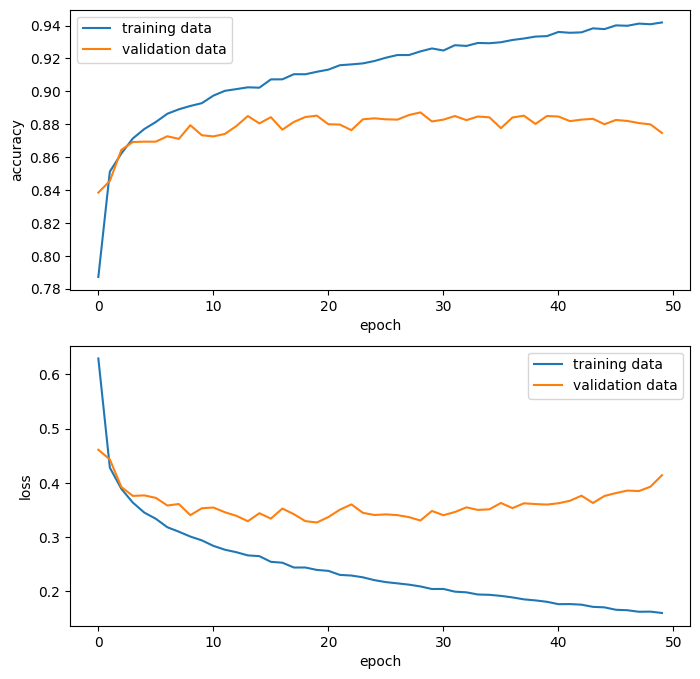

In [57]:
acc = history12.history['accuracy']
val_acc = history12.history['val_accuracy']

loss = history12.history['loss']
val_loss = history12.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [58]:
model12.evaluate(X_test, y_test)
y_pred = model12.predict(X_test)

# Find the predicted labels
y_pred_labels = [np.argmax(i) for i in y_pred]

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8711 - loss: 0.4217
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1000
           1       0.99      0.96      0.98      1000
           2       0.82      0.72      0.77      1000
           3       0.89      0.85      0.87      1000
           4       0.73      0.87      0.79      1000
           5       0.97      0.96      0.96      1000
           6       0.67      0.73      0.70      1000
           7       0.96      0.90      0.93      1000
           8       0.96      0.97      0.97      1000
           9       0.90      0.98      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



# Model 13 Experimenting with L1 regulizer

In [59]:
from tensorflow.keras import models, layers, regularizers

ann_L1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l1(0.001)),  # L1 regularization on the first layer
    layers.Dense(10, activation='softmax')  # Output layer, regularization not commonly needed here
])
ann_L1.compile(optimizer=optimizers.Adam(learning_rate=0.003),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann_L1.fit(X_train, y_train,
         epochs= 20,
         batch_size=256,  # Set batch size to 256
         validation_data=(X_valid, y_valid),
         verbose = 1 )


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7039 - loss: 2.7222 - val_accuracy: 0.7748 - val_loss: 0.9634
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8017 - loss: 0.9092 - val_accuracy: 0.8153 - val_loss: 0.8274
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8110 - loss: 0.8280 - val_accuracy: 0.8077 - val_loss: 0.8059
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8153 - loss: 0.7754 - val_accuracy: 0.8239 - val_loss: 0.7545
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8232 - loss: 0.7361 - val_accuracy: 0.8250 - val_loss: 0.7435
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8265 - loss: 0.7284 - val_accuracy: 0.8253 - val_loss: 0.7220
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8300 - loss: 0.7073 - val_accuracy: 0.8063 - val_loss: 0.7564
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8272 - loss: 0.6998 - val_accuracy: 0

In [60]:
ann_L1.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8403 - loss: 0.6294


[0.6374464631080627, 0.8355000019073486]

In [61]:
ann_L1.evaluate(X_test, y_test)
y_pred = ann_L1.predict(X_test)

# Find the predicted labels
y_pred_labels = [np.argmax(i) for i in y_pred]

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8403 - loss: 0.6294
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1000
           1       0.99      0.94      0.96      1000
           2       0.73      0.72      0.72      1000
           3       0.86      0.84      0.85      1000
           4       0.72      0.78      0.75      1000
           5       0.95      0.88      0.92      1000
           6       0.62      0.58      0.60      1000
           7       0.85      0.96      0.90      1000
           8       0.92      0.95      0.93      1000
           9       0.95      0.90      0.92      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# Model 14 Experimenting with adding L2 regulizer

In [62]:
ann_L2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),  # L1 regularization on the first layer
    layers.Dense(10, activation='softmax')  # Output layer, regularization not commonly needed here
])

ann_L2.compile(optimizer=optimizers.Adam(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann_L2.fit(X_train, y_train,
         epochs= 15,
         batch_size=256,  # Set batch size to 32
         validation_data=(X_valid, y_valid),
         verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7057 - loss: 1.0803 - val_accuracy: 0.8334 - val_loss: 0.6259
Epoch 2/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8450 - loss: 0.5957 - val_accuracy: 0.8474 - val_loss: 0.5664
Epoch 3/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8555 - loss: 0.5320 - val_accuracy: 0.8579 - val_loss: 0.5177
Epoch 4/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8614 - loss: 0.4948 - val_accuracy: 0.8598 - val_loss: 0.4896
Epoch 5/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8656 - loss: 0.4706 - val_accuracy: 0.8513 - val_loss: 0.5022
Epoch 6/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8672 - loss: 0.4586 - val_accuracy: 0.8675 - val_loss: 0.4563
Epoch 7/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8752 - loss: 0.4299 - val_accuracy: 0.8604 - val_loss: 0.4719
Epoch 8/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8689 - loss: 0.4359 - val_accurac

In [63]:
ann_L2.evaluate(X_test, y_test)
y_pred = ann_L2.predict(X_test)

# Find the predicted labels
y_pred_labels = [np.argmax(i) for i in y_pred]

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8609 - loss: 0.4490
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      1000
           1       0.99      0.96      0.98      1000
           2       0.85      0.65      0.74      1000
           3       0.89      0.86      0.88      1000
           4       0.81      0.74      0.77      1000
           5       0.97      0.94      0.95      1000
           6       0.58      0.68      0.63      1000
           7       0.93      0.93      0.93      1000
           8       0.96      0.96      0.96      1000
           9       0.92      0.96      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# Model 15 Experimenting with dropout

In [64]:
# Use dropout and batch normalization

from keras.layers import Dropout, BatchNormalization

ann3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation=None),
    layers.BatchNormalization(),
    layers.Activation('relu'),  # Apply ReLU after batch normalization
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

ann3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann3.fit(X_train, y_train,
         epochs= 12,
         batch_size=256,  # Set batch size to 256
         validation_data=(X_valid, y_valid),
         verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7200 - loss: 0.8231 - val_accuracy: 0.8423 - val_loss: 0.4582
Epoch 2/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8448 - loss: 0.4390 - val_accuracy: 0.8443 - val_loss: 0.4244
Epoch 3/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8592 - loss: 0.3938 - val_accuracy: 0.8587 - val_loss: 0.4034
Epoch 4/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8690 - loss: 0.3694 - val_accuracy: 0.8720 - val_loss: 0.3582
Epoch 5/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8749 - loss: 0.3447 - val_accuracy: 0.8694 - val_loss: 0.3560
Epoch 6/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8791 - loss: 0.3334 - val_accuracy: 0.8719 - val_loss: 0.3491
Epoch 7/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8850 - loss: 0.3163 - val_accuracy: 0.8744 - val_loss: 0.3415
Epoch 8/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8911 - loss: 0.3049 - val_accuracy:

In [65]:
ann3.evaluate(X_valid, y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8789 - loss: 0.3427


[0.3417716324329376, 0.8804000020027161]

In [66]:
ann3.evaluate(X_test, y_test)
y_pred = ann3.predict(X_test)

# Find the predicted labels
y_pred_labels = [np.argmax(i) for i in y_pred]

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8748 - loss: 0.3555
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.79      0.89      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.82      0.79      1000
           3       0.82      0.93      0.87      1000
           4       0.80      0.79      0.80      1000
           5       0.98      0.93      0.95      1000
           6       0.77      0.55      0.64      1000
           7       0.88      0.98      0.93      1000
           8       0.97      0.96      0.97      1000
           9       0.97      0.93      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Model 15 Experimeting with weight and bias initiliztion

In [67]:
ann_init = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation=None,
                 kernel_initializer='he_normal', bias_initializer='zeros'), # adding initilaization
    layers.BatchNormalization(),  # Add batch normalization
    layers.Activation('relu'),  # Apply ReLU after batch normalization
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax',
                kernel_initializer='glorot_uniform', bias_initializer='ones')
])
ann_init.compile(optimizer=optimizers.Adam(learning_rate=0.003),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann_init.fit(X_train, y_train,
         epochs= 20,
         batch_size=256,  # Set batch size to 32
         validation_data=(X_valid, y_valid),
         verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7623 - loss: 0.6959 - val_accuracy: 0.8476 - val_loss: 0.4154
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8616 - loss: 0.3913 - val_accuracy: 0.8563 - val_loss: 0.3824
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8754 - loss: 0.3459 - val_accuracy: 0.8657 - val_loss: 0.3649
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8797 - loss: 0.3301 - val_accuracy: 0.8597 - val_loss: 0.4013
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8887 - loss: 0.3078 - val_accuracy: 0.8657 - val_loss: 0.3728
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8928 - loss: 0.2889 - val_accuracy: 0.8722 - val_loss: 0.3489
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8967 - loss: 0.2796 - val_accuracy: 0.8778 - val_loss: 0.3365
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9013 - loss: 0.2682 - val_accuracy

In [68]:
ann_init.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8739 - loss: 0.3796


[0.38366708159446716, 0.8741999864578247]

In [69]:
ann_init.evaluate(X_test, y_test)
y_pred = ann_init.predict(X_test)

# Find the predicted labels
y_pred_labels = [np.argmax(i) for i in y_pred]

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8739 - loss: 0.3796
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1000
           1       0.99      0.96      0.98      1000
           2       0.82      0.73      0.77      1000
           3       0.90      0.85      0.87      1000
           4       0.79      0.82      0.80      1000
           5       0.97      0.95      0.96      1000
           6       0.63      0.77      0.69      1000
           7       0.92      0.96      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.97      0.94      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.88     10000
weighted avg       0.88      0.87      0.88     10000

